In [49]:
import pandas as pd
import numpy as np
import seaborn as sns

In [50]:
data=pd.read_csv('Salary_Data.csv')

In [51]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [52]:
data.info()
# No Null Values Present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [53]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Correlation

In [54]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


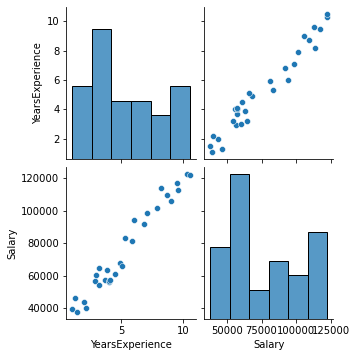

In [55]:
sns.pairplot(data)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

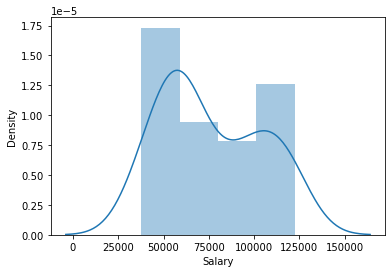

In [56]:
sns.distplot(data['Salary'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

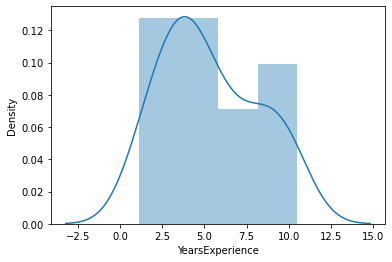

In [57]:
sns.distplot(data['YearsExperience'])

## Lets Fit a Linear Regression Model

In [58]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = data).fit()

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

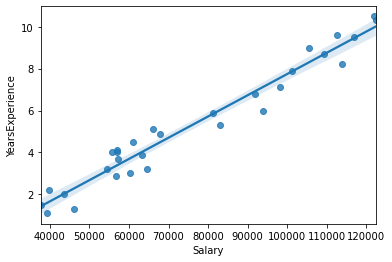

In [59]:
sns.regplot(x='Salary',y='YearsExperience',data=data)
# Best Fit Line For Regression Model

## Coefficients

In [60]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [61]:
model.tvalues
# t-values

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [62]:
model.pvalues
#p-values

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [63]:
# R-squared Values
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

 R-squared value is >0.95 Which means Model Build is Excellent Model

## Lets Predict For new Data points

In [64]:
## Lets Find Slary Hike For 10 & 20 Years Experience
newdata=pd.Series([10,20,5.5,10.5,11,11.5])

In [65]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [66]:
model.predict(data_pred)

0    120291.823413
1    214791.446628
2     77766.992967
3    125016.804574
4    129741.785735
5    134466.766895
dtype: float64